# Data Exploration

DATA inspection and cleaning

In [ ]:
#IMPORTING CLASSES TO BE USED FOR DATA EXPLORATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating data frame
# Try decoding the file with different codecs
possible_codecs = ['utf-8', 'latin-1', 'cp1252']
for codec in possible_codecs:
    try:
        df = pd.read_csv("/content/car data.csv", encoding=codec)
        print(f"File decoded successfully with {codec} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {codec} encoding.")

# If none of the codecs work, raise an error
else:
    raise ValueError("Unable to decode the file with any of the specified encodings.")

# Now df contains your DataFrame with the data from the CSV file, encoding='utf-8', latin = "")

File decoded successfully with utf-8 encoding.


In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
##DATA INSPECTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool

In [ ]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Display rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner]
Index: []


In [ ]:
df.duplicated().sum()

2

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


# DATA VISUALISATION

#Fuel_Type	Selling_type	Transmission

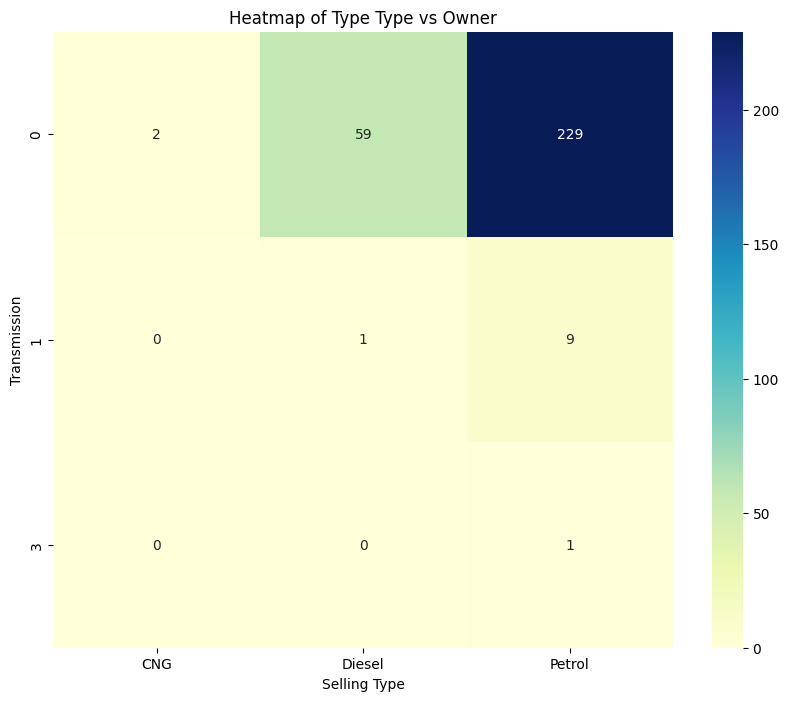

In [ ]:
# Assuming df is your DataFrame and 'fuel' and 'transmission' are the columns of interest
pivot_table = df.pivot_table(index='Owner', columns='Fuel_Type', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Type Type vs Owner')
plt.xlabel('Selling Type')
plt.ylabel('Transmission')
plt.show()

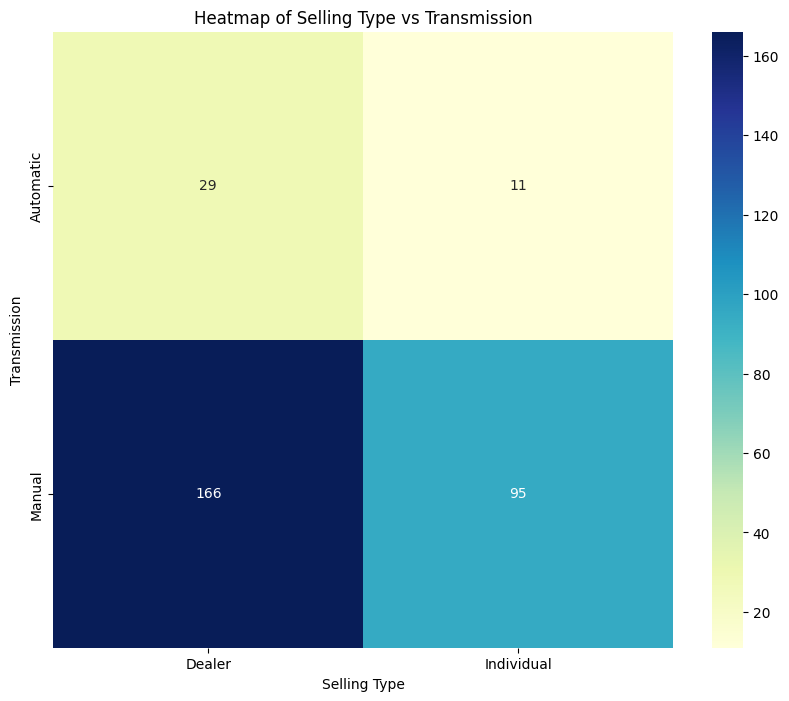

In [ ]:
# Assuming df is your DataFrame and 'fuel' and 'transmission' are the columns of interest
pivot_table = df.pivot_table(index='Transmission', columns='Selling_type', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Selling Type vs Transmission')
plt.xlabel('Selling Type')
plt.ylabel('Transmission')
plt.show()

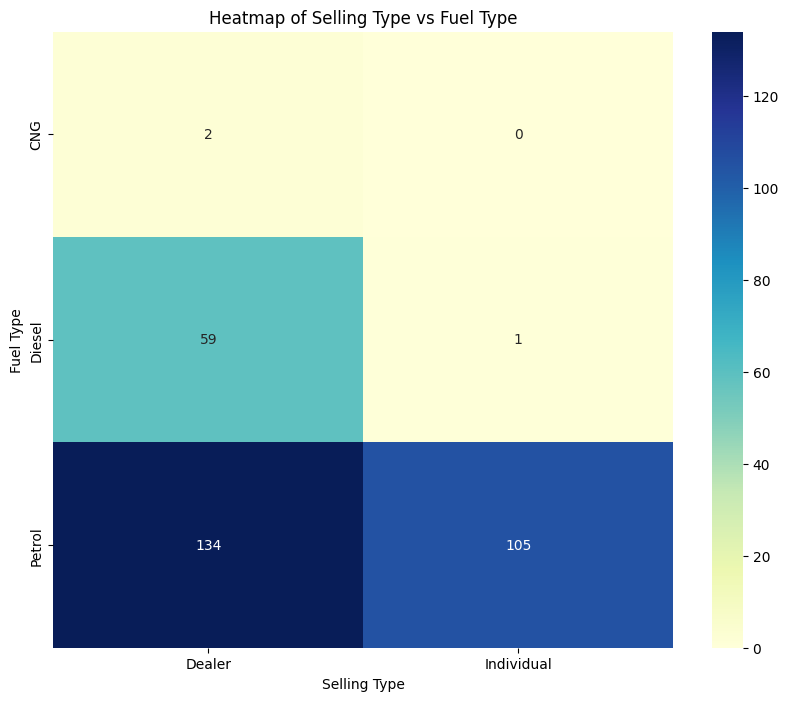

In [ ]:
# Assuming df is your DataFrame and 'fuel' and 'transmission' are the columns of interest
pivot_table = df.pivot_table(index='Fuel_Type', columns='Selling_type', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Selling Type vs Fuel Type')
plt.xlabel('Selling Type')
plt.ylabel('Fuel Type')
plt.show()

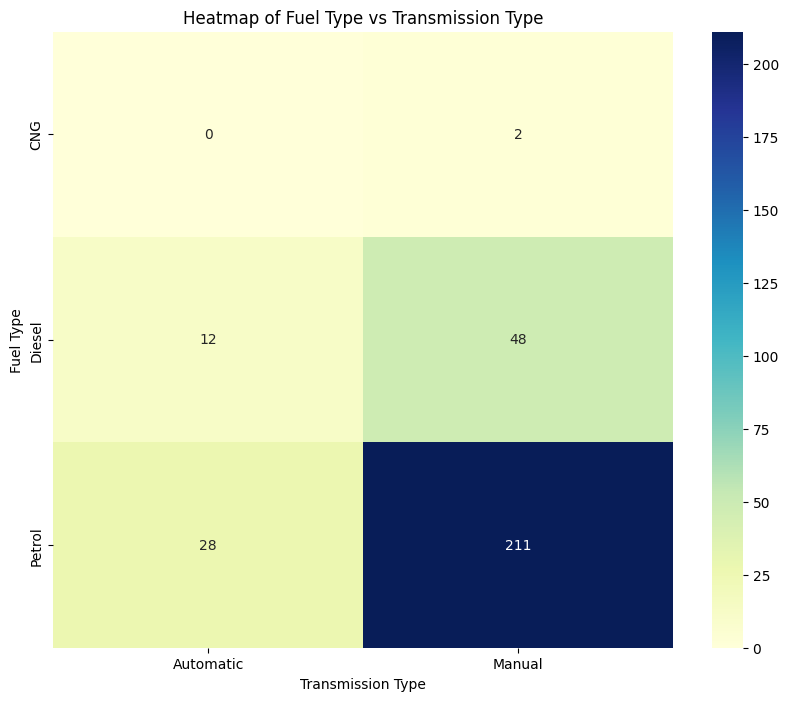

In [ ]:
# Assuming df is your DataFrame and 'fuel' and 'transmission' are the columns of interest
pivot_table = df.pivot_table(index='Fuel_Type', columns='Transmission', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Fuel Type vs Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Fuel Type')
plt.show()

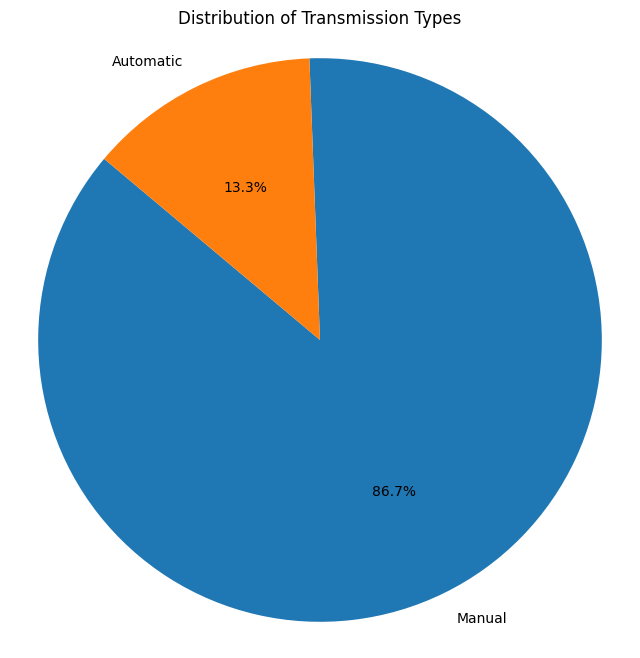

In [ ]:
# Assuming df is your DataFrame and 'fuel' is the column of interest
fuel_counts = df['Transmission'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

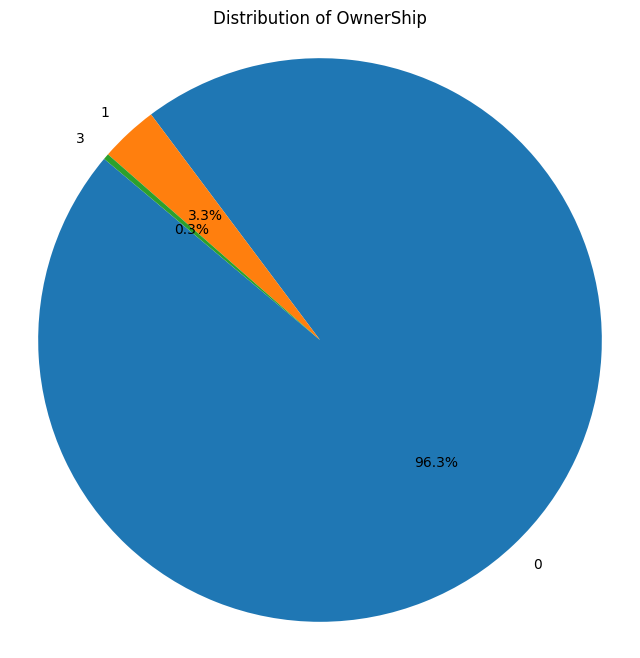

In [ ]:
# Assuming df is your DataFrame and 'fuel' is the column of interest
fuel_counts = df['Owner'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of OwnerShip')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

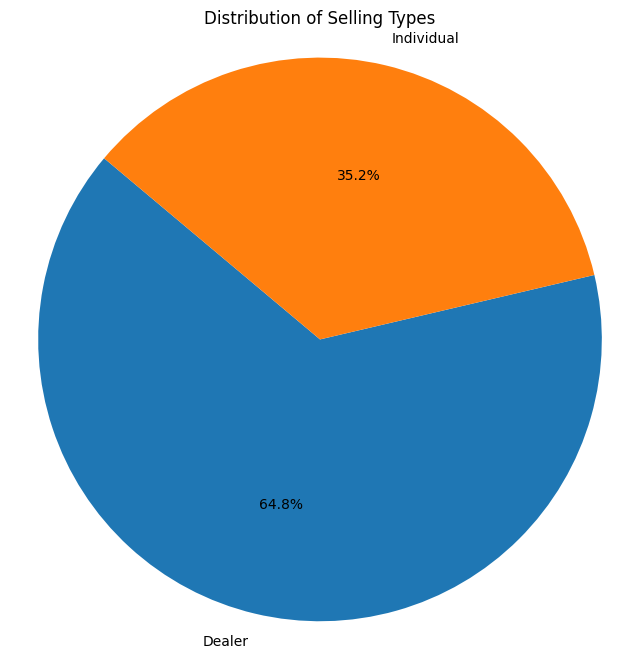

In [ ]:
# Assuming df is your DataFrame and 'fuel' is the column of interest
fuel_counts = df['Selling_type'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Selling Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

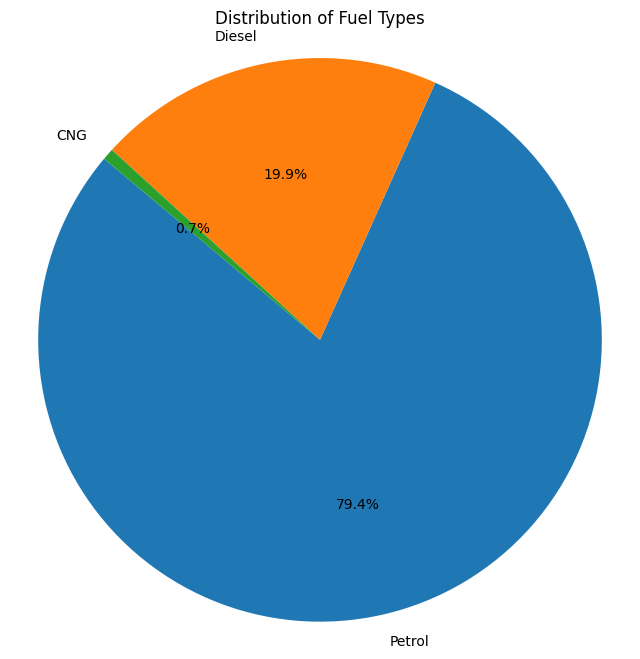

In [ ]:
# Assuming df is your DataFrame and 'fuel' is the column of interest
fuel_counts = df['Fuel_Type'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuel Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

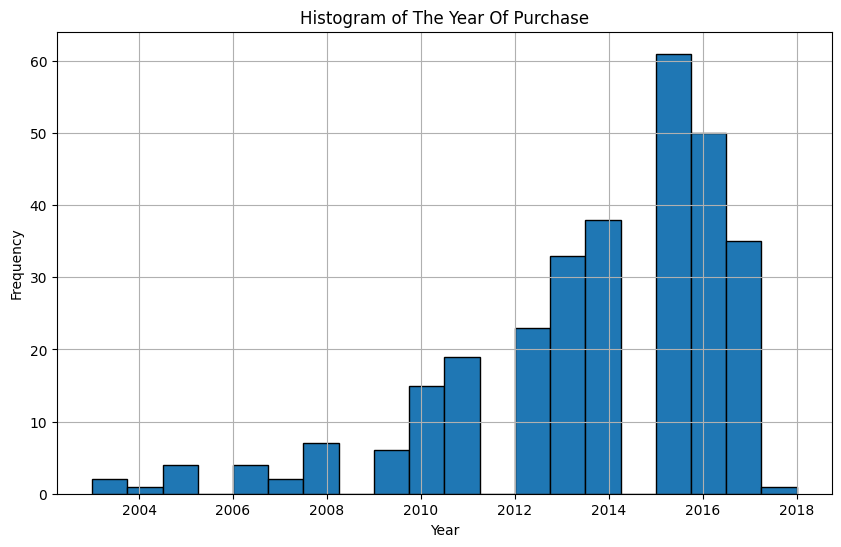

In [ ]:
# Assuming df is your DataFrame and 'carprice' is the column of interest
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Year'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of The Year Of Purchase')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

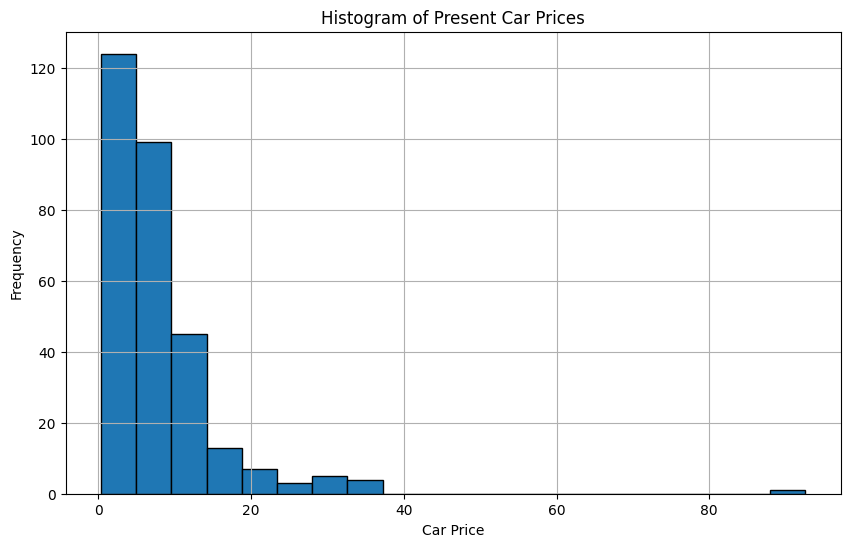

In [ ]:

# Assuming df is your DataFrame and 'carprice' is the column of interest
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Present_Price'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Present Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

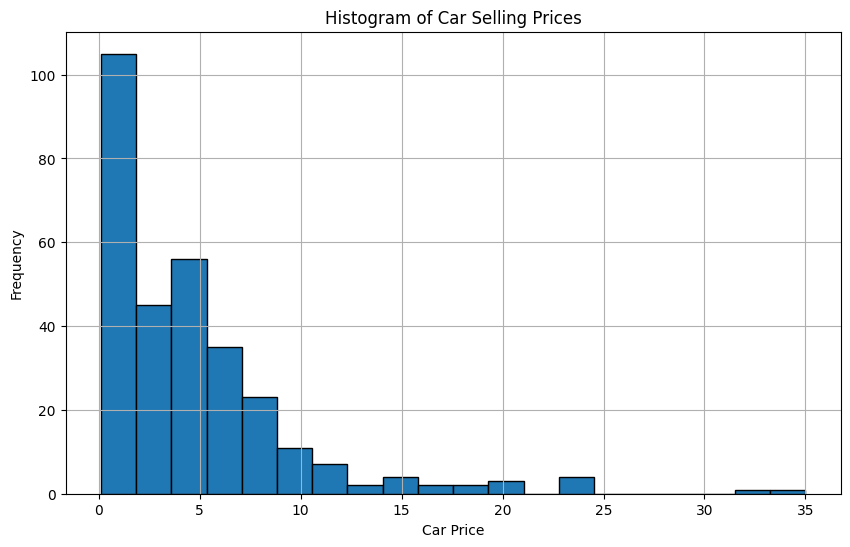

In [ ]:
# Assuming df is your DataFrame and 'carprice' is the column of interest
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Selling_Price'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Car Selling Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# MACHINE LEARNING MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
df.head(6)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


In [ ]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first')

# Encode 'Fuel_Type'
encoded_fuel = encoder.fit_transform(df[['Fuel_Type']]).toarray()
encoded_fuel_df = pd.DataFrame(encoded_fuel, columns=encoder.get_feature_names_out(['Fuel_Type']))

# Encode 'Selling_Type'
encoded_sell = encoder.fit_transform(df[['Selling_type']]).toarray()
encoded_sell_df = pd.DataFrame(encoded_sell, columns=encoder.get_feature_names_out(['Selling_type']))

# Encode 'Car Name'
encoded_car = encoder.fit_transform(df[['Car_Name']]).toarray()
encoded_car_df = pd.DataFrame(encoded_car, columns=encoder.get_feature_names_out(['Car_Name']))

# Encode 'Transmission'
encoded_transmission = encoder.fit_transform(df[['Transmission']]).toarray()
encoded_transmission_df = pd.DataFrame(encoded_transmission, columns=encoder.get_feature_names_out(['Transmission']))


In [ ]:
# Concatenate the encoded variables with the original dataframe
df = df.drop(columns=['Fuel_Type', 'Car_Name', 'Transmission','Selling_type'])

In [ ]:
# Concatenate the encoded variables with the original dataframe
df = pd.concat([df.reset_index(drop=True), encoded_fuel_df, encoded_transmission_df,encoded_car_df,encoded_sell_df], axis=1)

In [ ]:
df.head(3)

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Car_Name_Activa 3g,Car_Name_Activa 4g,...,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Selling_type_Individual
0,2014,3.35,5.59,27000,0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,4.75,9.54,43000,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2017,7.25,9.85,6900,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Prepare features and target
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [187]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

In [188]:
 # Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

In [190]:
mse_scores = []
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_scores.append(mse)

# Calculate the average MSE
mean_mse = np.mean(mse_scores)
print(f'Mean MSE from cross-validation: {mean_mse}')

Mean MSE from cross-validation: 9.293461950299648


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [236]:
# Define number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=49)

# Initialize an empty list to store MSE values
mse_values = []

# Iterate over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=85, random_state=38)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate MSE and store it
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_values)

print(f'Average Mean Squared Error across {num_folds} folds: {avg_mse}')

# Print the labels and predictions for the last fold as an example
print("Actual values:", y_test.values)
print("Predicted values:", y_pred)

Average Mean Squared Error across 10 folds: 1.9047734124775832
Actual values: [ 4.65  0.35 19.75 14.5   3.51  0.95  0.9   0.6   0.6   0.55  0.45  0.42
  0.4   0.35  0.3   0.3   0.27  0.25  0.25  0.2   0.17  0.16  2.75  5.11
  5.25  9.1   5.95  9.15  7.5   8.65]
Predicted values: [ 4.57941176  1.08352941 16.16458824 16.99247059  3.63847059  1.11447059
  0.73623529  0.65317647  0.69117647  0.59729412  0.56035294  0.57058824
  0.46152941  0.38129412  0.22082353  0.25376471  0.27082353  0.33752941
  0.24858824  0.19470588  0.18541176  0.21894118  2.98529412  5.04058824
  4.73117647  8.51929412  5.85       10.21564706  6.82705882  8.74894118]


In [224]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Average Cross-Validation RMSE: {cv_rmse_scores.mean():.2f}')



Mean Squared Error (MSE): 2.92
Root Mean Squared Error (RMSE): 1.71
R^2 Score: 0.83
Cross-Validation RMSE Scores: [3.35778784 2.06833171 5.73521787 4.41274658 6.51642782 8.25706188
 5.96849657 1.53722918 0.62633662 0.85072334]
Average Cross-Validation RMSE: 3.93
